# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.


In [25]:
# Importar librerías utiilzadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/rodolfo/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Cargar datos y mostrar las primeras 5 filas
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Resumen de las variables numéricas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Identificación de tipo de datos:

1. Date: Cualitativo ordinal.
2. Location: Cualitativo Nominal.
3. MinTemp: Cuantitativo contínuo.
4. MaxTemp: Cuantitativo contínuo.
5. Rainfall: Cuantitativo contínuo.
6. Evaporation: Cuantitativo contínuo.
7. Sunshine: Cuantitativo contínuo.
8. WindGustDir: Cualitativo ordinal.
9. WindGustSpeed: Cuantitativo contínuo.
10. WindDir9am: Cualitativo ordinal.
11. WindDir3pm: Cualitativo ordinal.
12. WindSpeed9am: Cuantitativo contínuo.
13. indSpeed3pm: Cuantitativo contínuo.
14. Humidity9am: Cuantitativo contínuo.
15. Humidity3pm: Cuantitativo contínuo.
16. Pressure9am: Cuantitativo contínuo.
17. Pressure3pm: Cuantitativo contínuo.
18. Cloud9am: Cuantitativo discreto.
19. Cloud3pm: Cuantitativo discreto.
20. Temp9am: Cuantitativo contínuo.
21. Temp3pm: Cuantitativo contínuo.
22. RainToday: Cualitativo nominal dicotómico.
23. RainTomorrow: Cualitativo nominal dicotómico.

### Análisis de variables de entrada y salida:

Las variables de 1 a 22 son de entrada y la 23 es de salida.

### Análisis de distribuciones de variables numéricas
#### Variables cuantitativas

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

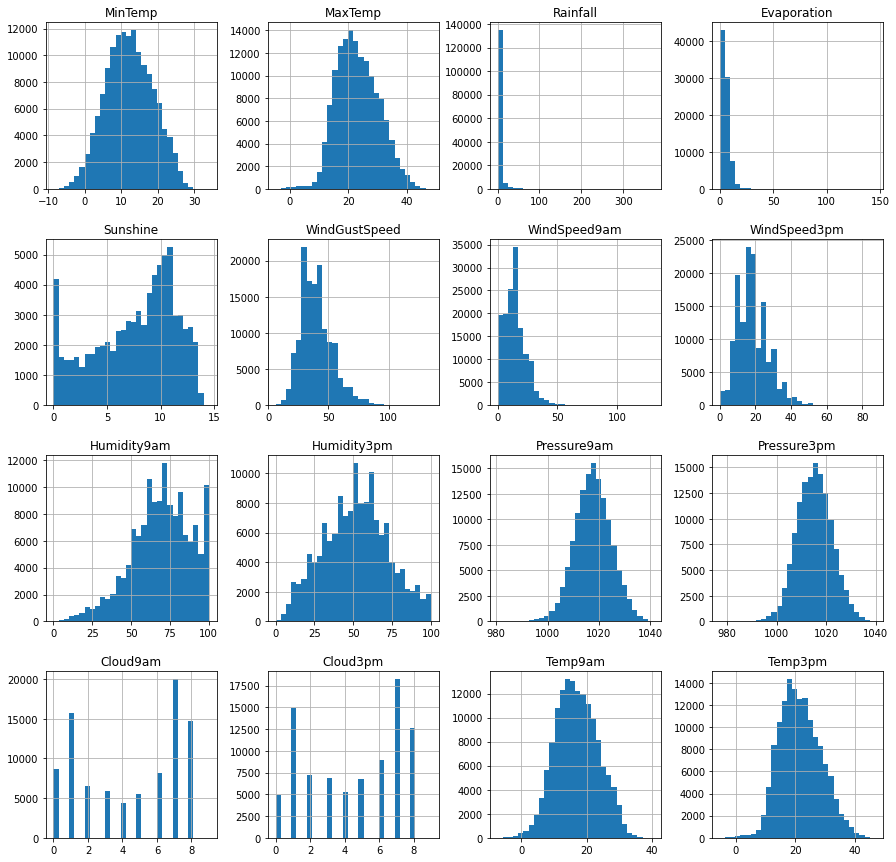

In [4]:
# Mostrar histogramas para cada una de las variables numéricas
df.hist(bins=30, figsize=(15, 15))

A partir de los histogramas anteriores se puede ver que algunas variables tienen una distribución
aproximadamente normal (`minTemp`, `maxTemp`, `Temp9am`, etc.) mientras que otras presentan mayores
frecuencias en valores alejados de la media (`Cloud9am` y `Cloud3pm` por ejemplo).
También me resulta llamativo que `Rainfall` y `Evaporation` tengan todos sus valores concentrados en los valores más bajos, mientras que las frecuencias para los valores más altos son inapreciables. Esto me hace
sospechar que puede haber outliers en la parte superior del rango.

#### Variables cualitativas

1. Date: Se puede transformar en cuantitativo discreto tomando los meses.
2. Location: Se puede transformar en dos variables cuantitativas contínuas usando la latitud y longitud.
8. WindGustDir: Se puede transformar en cuantitativo discreto. Para darle un orden a los valores se puede utilizar la relación entre ellos dada por la rosa de los vientos. Por ejemplo: `N = 0`, `NNW = 1`, `NW = 2`, `NWW = 3` y así sucesivamente.
10. WindDir9am: Ídem `WindGustDir`.
11. WindDir3pm: Ídem `WindGustDir`.
22. RainToday: Se puede convertir en una variable binaria.
23. RainTomorrow: Ídem `RainToday`.

### Variables de salida

Como fue mostrado en el inciso anterior, la variable de salida puede ser binarizada. Esto se debe a que son sólo dos valores posibles. Incluso, si usáramos _one-hot encoding_ tendríamos 2 columnas, donde el valor de una sería el opuesto de la otra, con lo cual conservar ambas sería redundante.

Respecto a si es balanceada o no, se muestra la siguiente celda.

In [5]:
# Conteo de frecuencia de cada valor de salida
pd.value_counts(df['RainTomorrow'])

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Se puede ver que los días en los que no llueve son entre 3 y 4 veces más que los del caso opuesto, con lo cual se puede afirmar que **no están balanceadas las clases**. Una alternativa sería quitar filas en las cuales no llueve, pero eso llevaría a una gran pérdida de datos de entrenamiento.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.



Para las particiones de datos entre entrenamiento y validación, voy a elegir la relación 80/20. De todos modos, realizaré las pariticiones tras hacer la limpieza de datos, que tiene lugar en el próximo punto.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.



Primero vemos la cantidad de datos totales y faltantes:

In [6]:
# Cantidad total de datos
df.shape[0]

145460

In [7]:
# Cantidad de datos faltantes por columna
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

A partir de los números observados se puede ver que hay categorías en las cuales falta entre el 30% y el 50% de los datos:
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm
Y otras en las cuales faltan alrededor del 10% de los datos:
- WindGustDir
- WindGustSpeed
- WindDir9am
- Pressure9am
- Pressure3pm

Ahora analizo cuántos `NaN`s por fila hay

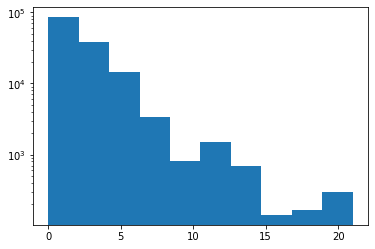

In [8]:
# Mostrar en un histograma los NaNs por fila
nans_row = df.isnull().sum(axis=1).tolist()
plt.hist(nans_row)
plt.yscale('log')

En la gráfica anterior se puede ver que hay varias filas (aproximadamente 3000) en las cuales hay más de 10 `NaN`, con lo cual se pierden muchos valores de entrada simultáneamente. Considerando que son sólo un 2% de los datos, parece tener sentido descartar esas filas

In [9]:
# Mostrar los NaN por columna tras quitar del dataframe las filas con 10 o más NaN
df_nan_10 = df[df.isnull().sum(axis=1) < 10]
df_nan_10.isna().sum()

Date                 0
Location             0
MinTemp            268
MaxTemp            248
Rainfall          2095
Evaporation      60482
Sunshine         67305
WindGustDir       8078
WindGustSpeed     8026
WindDir9am        8716
WindDir3pm        2090
WindSpeed9am       305
WindSpeed3pm       950
Humidity9am       1164
Humidity3pm       2370
Pressure9am      12217
Pressure3pm      12234
Cloud9am         53628
Cloud3pm         56335
Temp9am            324
Temp3pm           1504
RainToday         2095
RainTomorrow      2235
dtype: int64

A primera vista no parecen haberse reducido (al menos considerablemente) los `NaN` de las columnas con más ocurrencias de los mismos.

Sería interesante ver cuántas filas quedan en el dataframe tras quitar todas las columnas que contengan algún `NaN`:

In [10]:
# Ver cuántos datos quedan tras eliminar todas filas que tienen algún NaN
df_dropna = df.dropna()
df_dropna.shape

(56420, 23)

Se puede ver que el dataframe resultante tiene sólo un tercio de la cantidad inicial de filas, lo cual representa una gran pérdida de datos potencialmente útiles para el entrenamiento.

Por otro lado, tendría sentido desechar todas las filas que tienen `NaN` para la variable de salida, dado que no son muchas y podría causar problemas si les imputase un valor inadecuado.

In [11]:
# Retiro las filas que tienen NaN en la variable de salida
df_nan_10_filtered_out = df[df['RainTomorrow'].notnull()]
df_nan_10_filtered_out.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Nuevamente el filtrado implementado no redujo perceptiblemente la cantidad de `NaN`s en las columnas que más valores de ese tipo tienen

Finalmente voy a ver si la variable de salida tiene alguna relación con el hecho de que una variable sea `NaN` o no. De esta manera veo si el hecho de que sea `NaN` es relevante para calcular la salida o no.
El planteo es separar el dataframe en 2: por un lado las filas que generan un resultado positivo y por otro el resto de las filas. Si el hecho de que una variable sea NaN o no no influyera en el resultado, la distribución de `NaN`s en cada dataframe debería ser pareja.

In [12]:
# Hago un dataframe con los datos cuya salida es positiva y otro con el caso opuesto.
rains_tomorrow = df[df['RainTomorrow'] == 'Yes']
not_rains_tomorrow = df[df['RainTomorrow'] == 'No']

# Calculo la relación entre valores positivos y negativos de la variable de salida
# de modo de tener una referencia
referencia = rains_tomorrow.shape[0] / not_rains_tomorrow.shape[0]

# Maniobra para evitar division por 0
not_rains_tomorrow = not_rains_tomorrow.isna().sum().to_numpy()
not_rains_tomorrow = np.where(not_rains_tomorrow == 0, 1e-3, not_rains_tomorrow)

# Calculo la relación entre los NaNs de cada dataframe
ratios = rains_tomorrow.isna().sum().to_numpy() / not_rains_tomorrow

# Muestro la desviación con respecto a la referencia de manera porcentual
for i, col in enumerate(df.columns):
    print(col, (ratios[i] - referencia) * 100 / referencia)


Date -100.0
Location -100.0
MinTemp 31.086249133744182
MaxTemp -28.71264653850316
Rainfall 220.46816938910305
Evaporation 3.6022848167009167
Sunshine -1.243456088548089
WindGustDir 24.398806681943736
WindGustSpeed 23.76937870757947
WindDir9am -17.845273442061842
WindDir3pm 33.7281782355516
WindSpeed9am 16.729183752429353
WindSpeed3pm 21.399197502843773
Humidity9am 49.03237949902194
Humidity3pm 26.08059735276402
Pressure9am -1.5811505816422267
Pressure3pm -0.8733214040455888
Cloud9am -8.141315556795261
Cloud3pm -11.86510166362075
Temp9am 70.17850481600533
Temp3pm 29.426528076163702
RainToday 220.46816938910305
RainTomorrow -100.0


A partir de la información anterior se puede ver que hay que tener particular cuidado a la hora de imputarle valores a `Rainfall`, `RainToday` y otras más, pero los valores de `Evaporation`, `Sunshine`, `Cloud9am` y `Cloud3pm` no son preocupantes. Por esto parece sensato imputarles el valor promedio de cada columna.

De todos modos, antes que eso me parece más sensato convertir las variables categóricas en numéricas para poder ver qué variables son las más importantes. Luego de eso podré descartar las menos importantes y finalmente imputaré valores a los `NaN`s de las columnas restantes.

In [13]:
# Renombro el dataframe por algo más corto
df2 = df_nan_10_filtered_out

# Remplazo las fechas por los meses
df2['Date'] = pd.to_datetime(df2['Date']).dt.month

df2.head()

/home/rodolfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
# Remplazo los la ubicación por la latitud y longitud
df2['Latitude'] = df2['Location']
df2['Latitude'].replace(
    {
        'Albury': -36.073730,
        'BadgerysCreek': -33.887421,
        'Cobar': -31.494930,
        'CoffsHarbour': -30.296350,
        'Moree': -29.463551,
        'Newcastle': 32.9762964,
        'NorahHead': 33.2837329,
        'NorfolkIsland': 31.7427489,
        'Penrith': 33.7448104,
        'Richmond': 33.6057416,
        'Sydney': 33.8473552,
        'SydneyAirport': 33.9399183,
        'WaggaWagga': 35.1380069,
        'Williamtown': 37.8610963,
        'Wollongong': 34.4396078,
        'Canberra': 35.2812958,
        'Tuggeranong': 35.4765316,
        'MountGinini': 35.5293662,
        'Ballarat': 37.5672952,
        'Bendigo': 36.7370003,
        'Sale': 38.10603,
        'MelbourneAirport': 37.669008,
        'Melbourne': 37.9716913,
        'Mildura': 34.210665,
        'Nhil': 36.3060082,
        'Portland': 38.3567408,
        'Watsonia': 37.7099347,
        'Dartmoor': 37.8932172,
        'Brisbane': 27.381252,
        'Cairns': 16.8801501,
        'GoldCoast': 27.9538471,
        'Townsville': 19.2966267,
        'Adelaide': 34.999881,
        'MountGambier': 37.826287,
        'Nuriootpa': 34.4663903,
        'Woomera': 31.1667725,
        'Albany': 34.9920266,
        'Witchcliffe': 34.0131846,
        'PearceRAAF': 31.6675792,
        'PerthAirport': 31.938543,
        'Perth': 32.0391723,
        'SalmonGums': 32.8546419,
        'Walpole': 34.98415,
        'Hobart': 42.8344115,
        'Launceston': 41.4345956,
        'AliceSprings': 23.7206229,
        'Darwin': 12.4257239,
        'Katherine': 14.4664336,
        'Uluru': 25.3456376,
    },
    inplace=True,
)

df2['Location'].replace(
    {

        'Albury': 146.913544,
        'BadgerysCreek': 150.740509,
        'Cobar': 145.840164,
        'CoffsHarbour': 153.115692,
        'Moree': 149.841721,
        'Newcastle': 151.5492742,
        'NorahHead': 151.5572472,
        'NorfolkIsland': 150.0402983,
        'Penrith': 150.6719804,
        'Richmond': 150.7411209,
        'Sydney': 150.651109,
        'SydneyAirport': 151.1730824,
        'WaggaWagga': 147.3289317,
        'Williamtown': 144.8677045,
        'Wollongong': 150.7184796,
        'Canberra': 149.1248112,
        'Tuggeranong': 149.0149864,
        'MountGinini': 148.7635024,
        'Ballarat': 143.7825297,
        'Bendigo': 144.2121133,
        'Sale': 147.0355783,
        'MelbourneAirport': 144.8388333,
        'Melbourne': 144.7722715,
        'Mildura': 142.098499,
        'Nhil': 141.4408528,
        'Portland': 141.5744137,
        'Watsonia': 145.076271,
        'Dartmoor': 141.1708911,
        'Brisbane': 152.712328,
        'Cairns': 145.5765169,
        'GoldCoast': 153.2289349,
        'Townsville': 146.6850256,
        'Adelaide': 138.3302946,
        'MountGambier': 140.7630918,
        'Nuriootpa': 138.9490237,
        'Woomera': 136.781275,
        'Albany': 117.8518532,
        'Witchcliffe': 115.0768164,
        'PearceRAAF': 116.0270489,
        'PerthAirport': 115.9650552,
        'Perth': 115.6806691,
        'SalmonGums': 121.4065693,
        'Walpole': 116.729717,
        'Hobart': 147.2330969,
        'Launceston': 147.0662543,
        'AliceSprings': 133.8326704,
        'Darwin': 130.8630968,
        'Katherine': 132.2625566,
        'Uluru': 131.0283696,
    },
    inplace=True,
)
df2.rename(columns = {'Location': 'Longitude'}, inplace = True)
df2.head()

/home/rodolfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rodolfo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/rodolfo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Date,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude
0,12,146.913544,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.07373
1,12,146.913544,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.07373
2,12,146.913544,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.07373
3,12,146.913544,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.07373
4,12,146.913544,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.07373


In [22]:
# Remplazo los puntos cardinales por enteros
reference = {
    'E': 12,
    'ENE': 13,
    'ESE': 11,
    'N': 0,
    'NE': 14,
    'NNE': 15,
    'NNW': 1,
    'NW': 2,
    'S': 8,
    'SE': 10,
    'SSE': 9,
    'SSW': 7,
    'SW': 6,
    'W': 4,
    'WNW': 3,
    'WSW': 5,
}
for col_name in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df2[col_name].replace(reference, inplace=True)

df2['WindGustDir'].head()

0     4.0
1     3.0
2     5.0
3    14.0
4     4.0
Name: WindGustDir, dtype: float64

In [23]:
# Binarizo las que tienen solo 2 valores posibles
for col_name in ['RainToday', 'RainTomorrow']:
    df2[col_name].replace({'Yes': True, 'No': False}, inplace=True)

df2.head()

/home/rodolfo/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Date,Longitude,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude
0,12,146.913544,13.4,22.9,0.6,NaN,NaN,4.0,44.0,4.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,False,-36.07373
1,12,146.913544,7.4,25.1,0.0,NaN,NaN,3.0,44.0,1.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,False,-36.07373
2,12,146.913544,12.9,25.7,0.0,NaN,NaN,5.0,46.0,4.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,False,-36.07373
3,12,146.913544,9.2,28.0,0.0,NaN,NaN,14.0,24.0,10.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,False,-36.07373
4,12,146.913544,17.5,32.3,1.0,NaN,NaN,4.0,41.0,13.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,-36.07373


<AxesSubplot:>

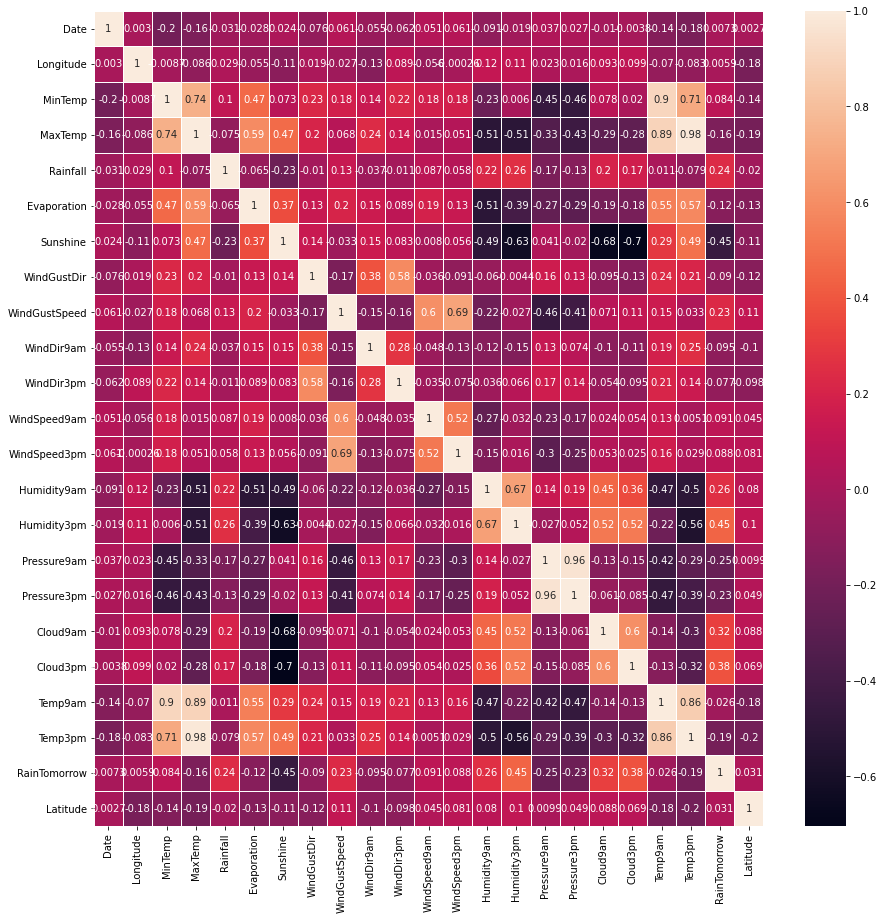

In [30]:
# Mostrar matriz de correlacion
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, ax=ax)

A partir de la imagen anterior se puede ver que hay conjuntos altamente correlacionados:

- `Temp9am`, `Temp3pm`, `MinTemp` y `MaxTemp`
- `Pressure9am`, `Pressure3pm`

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.